# [[5,1,2]] lattice code

In [1]:
import stim

In [84]:
def synd_x(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    size = len(qubits)
    q = range(n_qubits + 1)
    if size > 2:
        for i_q in range(size - 1):
            qc.append_operation('CX',[q[qubits[size - 1]], q[qubits[i_q]]])
    else:
        qc.append_operation('CX',[q[qubits[size - 1]], q[qubits[0]]])
    return qc

def synd_z(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    size = len(qubits)
    q = range(n_qubits + 1)
    if size > 2:
        for i_q in range(size - 1):
            qc.append_operation('CZ',[q[qubits[size - 1]], q[qubits[i_q]]])
    else:
        qc.append_operation('CZ',[q[qubits[size - 1]], q[qubits[0]]])
    return qc


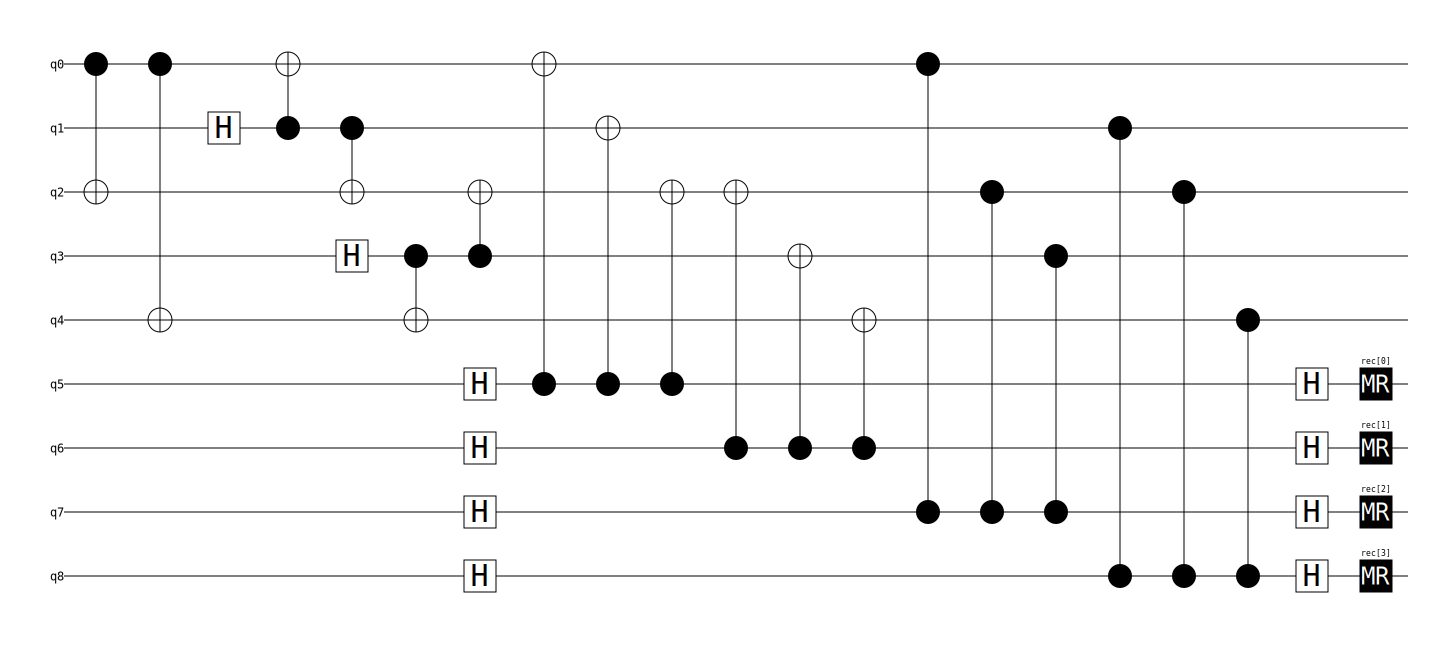

In [91]:
qc_512 = stim.Circuit()

#Information encoder
qc_512.append_operation('CX',[0, 2])
qc_512.append_operation('CX',[0, 4])
qc_512.append_operation('H',[1])
qc_512.append_operation('CX',[1, 0])
qc_512.append_operation('CX',[1, 2])
qc_512.append_operation('H',[3])
qc_512.append_operation('CX',[3, 4])
qc_512.append_operation('CX',[3, 2])

#Syndrome extraction
qc_512.append_operation('H',[5, 6, 7, 8])
s1 = synd_x([0, 1, 2, 5])
qc_512 = qc_512 + s1
s1 = synd_x([2, 3, 4, 6])
qc_512 = qc_512 + s1
s1 = synd_z([0, 2, 3, 7])
qc_512 = qc_512 + s1
s1 = synd_z([1, 2, 4, 8])
qc_512 = qc_512 + s1
qc_512.append_operation('H',[5, 6, 7, 8])

qc_512.append_operation('MR', [5, 6, 7, 8])

qc_512.diagram('timeline-svg')